# Quantum perceptron on IBM Q

## Table of contents

### 1. [API Access Setup](#api_access_setup)
### 2. [Classical Perceptron](#classical_perceptron)
### 3. [Quantum Perceptron](#quantum_perceptron)
### 4. [Implementation](#implementation)

------------------
------------------

## 1. API Access Setup<a id='api_access_setup'></a>

### Setup the filesystem access to the configuration file and register access

In [2]:
# Setup the filesystem path to the data file

# System library to be used for path management
from os import path

# Configuration file parser
from configparser import ConfigParser

# Basic qiskit modules
from qiskit import available_backends, execute, register, least_busy

In [3]:
# Print the home directory path
user_home_dir = str(path.expanduser('~'))
print('Home directory for the current user : ', user_home_dir)

# Local path to the configuration file
config_path = 'Documents\\GitHub\\Quantum-Notebooks\\API.cfg'

# Get the correct POSIX path of the configuration file
configFilePath = path.join(user_home_dir, config_path)
print("The configuration file currently being read " + str(configFilePath))
        
# Setup the configuration reader file buffer
configReader = ConfigParser()
configReader.read(configFilePath)
        
# Get the APItoken and the URL from the configuration file and list all
# the available backends from IBM Q
try:
    # Read in the API token and the URL, and register
    register(configReader.get('API', 'APItoken'), configReader.get('API', 'URL'))
except: 
    print('Error. Invalid token or URL entered')

Home directory for the current user :  C:\Users\Alpha
The configuration file currently being read C:\Users\Alpha\Documents\GitHub\Quantum-Notebooks\API.cfg


### Retrieve the least busy simulator and actual quantum backends

In [4]:
# List the available actual Q backends
print('The list of available Q backends for this API token', available_backends({'local': False, 'simulator': False}))

The list of available Q backends for this API token ['ibmq_16_melbourne', 'ibmqx4']


In [5]:
# List the remote simulator backends
print('The list of available remote simulator backends for this API token', available_backends({'local': False, 'simulator': True}))

The list of available remote simulator backends for this API token ['ibmq_qasm_simulator']


In [6]:
least_busy_sim_backend = least_busy(available_backends({'simulator': True, 'local': False}))
least_busy_actual_backend = least_busy(available_backends({'simulator': False, 'local': False}))

-----
-----

## 2. Classical Perceptron<a id='classical_perceptron'></a>

In [7]:
# Python implementation of the classical perceptron

-------------------
-------------------

## 3. Quantum Perceptron<a id='quantum_perceptron'></a>

#### The implementation is based on the article given below :

In [1]:
# Show the pdf file using the IPython library
from IPython.display import HTML
HTML('<iframe src=https://arxiv.org/pdf/1811.02266.pdf width=980 height=1000></iframe>')

#### Implementing and executing the circuit in Fig. 2.

#### Import the essential libraries

In [9]:
# Import the QisKit modules to initialize the circuit

# Basic qiskit modules
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute

# Basic visualiztion tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

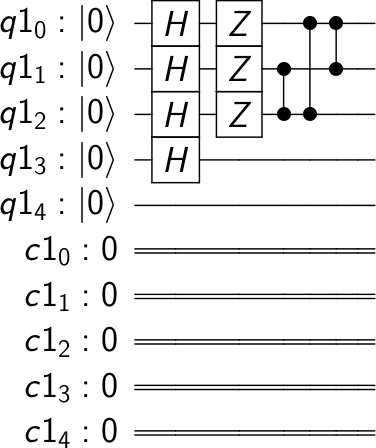

In [11]:
# Initialize the Quantum Circuit

# Number of quantum registers
qreg = 5

# Number of classical registers
creg = 5

# Create a quantum register "qr" with qreg qubits
qr = QuantumRegister(qreg)

# Create a classical register called "cr" with creg bits
cr = ClassicalRegister(creg)

# Create a Quantum Circuit involving "qr" and "cr"
circuit_1 = QuantumCircuit(qr, cr)

# Add the operations to the Quantum circuit 

# Add a Hadamard gate to put the first 4 qubits in a superposition
circuit_1.h(qr[0])
circuit_1.h(qr[1])
circuit_1.h(qr[2])
circuit_1.h(qr[3])

# Add the single qubit Z gate to the first 3 qubits
circuit_1.z(qr[0])
circuit_1.z(qr[1])
circuit_1.z(qr[2])

# Add the two-qubit controlled-Z gate to the first 3 qubits
circuit_1.cz(qr[1], qr[2])
circuit_1.cz(qr[0], qr[2])
circuit_1.cz(qr[0], qr[1])

    
# Measure the last qubit in the sequence
circuit_1.measure(qr[4], cr[4])

# Draw the given circuit
circuit_drawer(circuit_1)

--------
--------

## 4. Implementation<a id='implementation'></a>

--------------
--------------